In [50]:
IMAGE_SIZE = 64
IMAGES_PER_CLASS = 4000
CLASSES = ['11212', '2456', '2780', '3001', '3002', '3003', '3004', '3005', '3006', '3007', '3008', '3009', '3010', '3020', '3021', '3022', '3023', '3024']

In [51]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
try:
    API_KEY = os.environ["REBRICKABLE_API_KEY"]
except:
    print('Please add your Rebrickable API Key to the project as instructed in the README.')

In [52]:
import os
import cv2
import pandas as pd
import torch
from torchvision.io import read_image
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import tqdm
import requests as r

class LegoDataset(Dataset):
    def __init__(self, dataset_path, transform=transforms.Compose([transforms.ToPILImage(), 
                                               transforms.Grayscale(num_output_channels=3),
                                               transforms.ToTensor()])):

        # Init output data
        x_data = []
        y_data = []
        labels = []

        encoding = { 'woohoo!': -1 }
        
        # For each class folder
        for label in os.listdir(dataset_path):

            # Only account for certain classes, ignore others
            if label in CLASSES:

                # Initialize variables to retrieve and store images
                curr_path = dataset_path + "/" + label

                # For each image
                for filename in tqdm.tqdm(os.listdir(curr_path)[:IMAGES_PER_CLASS]):

                    # Store image in tensor representation
                    image_path = curr_path + "/" + filename
                    img = cv2.imread(image_path)
                    img = transform(img)
                    # img = cv2.resize(img, (224,224), interpolation = cv2.INTER_CUBIC)

                    # Add tensor to data dictionary
                    x_data.append(img.float())
                    if label not in encoding:
                        encoding[label] = max(list(encoding.values())) + 1
                    y_data.append(encoding[label])
                    labels.append(label)

        self.x_data = x_data
        self.y_data = y_data
        self.labels = set(labels)
        self.encoding = encoding

        rebrickable_query = 'https://rebrickable.com/api/v3/lego/parts/?key=' + API_KEY + '&part_nums='
        for label in self.labels:
            rebrickable_query += label + ','

        self.brick_info = {}
        response = r.get(rebrickable_query).json()
        for entry in response['results']:
            self.brick_info[entry['part_num']] = entry

        self.brick_info = pd.DataFrame(self.brick_info).T

    def __len__(self):
        assert len(self.x_data) == len(self.y_data)
        return len(self.x_data)

    def __getitem__(self, idx):
        return (self.x_data[idx], self.y_data[idx])

In [53]:
dataset = LegoDataset('dataset')

100%|██████████| 4000/4000 [00:02<00:00, 1789.38it/s]


In [54]:
dataset.brick_info

,part_num,name,part_cat_id,part_url,part_img_url,external_ids,print_of
11212,11212,Plate 3 x 3,14,https://rebrickable.com/parts/11212/plate-3-x-3/,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['11212'], 'BrickOwl': ['855115'...",None
2456,2456,Brick 2 x 6,11,https://rebrickable.com/parts/2456/brick-2-x-6/,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['2456'], 'BrickOwl': ['448968']...",None
2780,2780,Technic Pin with Friction Ridges Lengthwise an...,53,https://rebrickable.com/parts/2780/technic-pin...,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['2780'], 'BrickOwl': ['33899'],...",None
3001,3001,Brick 2 x 4,11,https://rebrickable.com/parts/3001/brick-2-x-4/,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['3001'], 'BrickOwl': ['771344']...",None
3002,3002,Brick 2 x 3,11,https://rebrickable.com/parts/3002/brick-2-x-3/,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['3002'], 'BrickOwl': ['462227']...",None
3003,3003,Brick 2 x 2,11,https://rebrickable.com/parts/3003/brick-2-x-2/,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['3003'], 'BrickOwl': ['3003', '...",None
3004,3004,Brick 1 x 2,11,https://rebrickable.com/parts/3004/brick-1-x-2/,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['3004'], 'BrickOwl': ['442413']...",None
3005,3005,Brick 1 x 1,11,https://rebrickable.com/parts/3005/brick-1-x-1/,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['3005'], 'BrickOwl': ['656416']...",None
3008,3008,Brick 1 x 8,11,https://rebrickable.com/parts/3008/brick-1-x-8/,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['3008'], 'BrickOwl': ['273019']...",None
3009,3009,Brick 1 x 6,11,https://rebrickable.com/parts/3009/brick-1-x-6/,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['3009'], 'BrickOwl': ['340943']...",None


In [55]:
import torch.utils.data
from torch.utils.data import DataLoader

train_data, test_data = torch.utils.data.random_split(dataset, [int(len(dataset) * 0.8), int(len(dataset) * 0.2)])
train_dataloader = DataLoader(train_data, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=20, shuffle=True)

Feature batch shape: torch.Size([20, 3, 64, 64])
Labels batch shape: torch.Size([20])


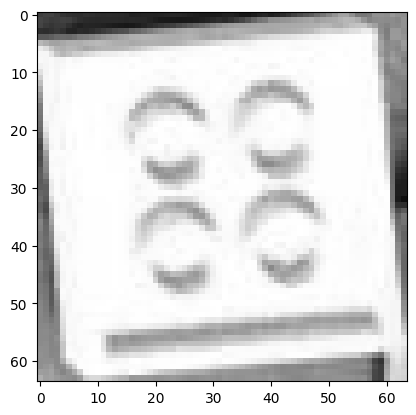

Label: 0


In [56]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.shape}")
print(f"Labels batch shape: {train_labels.shape}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.T, cmap="gray")
plt.show()
print(f"Label: {label}")

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.conv2 = nn.Conv2d(10, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(1024, 512)  # 5*5 from image dimension
        self.fc2 = nn.Linear(512, 200)
        self.dropout = nn.Dropout()
        self.fc3 = nn.Linear(200, 100)
        self.fc4 = nn.Linear(100, len(CLASSES))

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 3)
        x = F.max_pool2d(F.relu(self.conv2(x)), 3)
        x = F.max_pool2d(F.relu(self.conv3(x)), 1)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [58]:
net = Net().cpu()
print(net.to(torch.device('cpu')))

Net(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=200, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=18, bias=True)
)


In [59]:
from torchvision import datasets, models, transforms
from torchvision.models import ResNet34_Weights

model_ft = models.resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)
for param in model_ft.parameters():
    param.requires_grad = False
model_ft.fc = nn.Linear(512, len(CLASSES), 1)
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [60]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [61]:
loss_over_time = []
val_accuracy_over_time = []

In [62]:
for epoch in range(60):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # loss.requires_grad = True
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            loss_over_time.append(running_loss)
            running_loss = 0.0

    size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    net.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in test_dataloader:
            pred = net(X)
            test_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    val_accuracy_over_time.append(correct)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

[1,   100] loss: 28.886
[1,   200] loss: 28.791
[1,   300] loss: 28.719
[1,   400] loss: 28.664
[1,   500] loss: 28.610
[1,   600] loss: 28.562
[1,   700] loss: 28.516
[1,   800] loss: 28.479
[1,   900] loss: 28.430
[1,  1000] loss: 28.393
[1,  1100] loss: 28.354
[1,  1200] loss: 28.318
[1,  1300] loss: 28.303
[1,  1400] loss: 28.259
[1,  1500] loss: 28.231
[1,  1600] loss: 28.207
[1,  1700] loss: 28.184
[1,  1800] loss: 28.160
[1,  1900] loss: 28.143
[1,  2000] loss: 28.124
[1,  2100] loss: 28.090
[1,  2200] loss: 28.085
[1,  2300] loss: 28.048
[1,  2400] loss: 28.038
[1,  2500] loss: 28.014
Test Error: 
 Accuracy: 6.4%, Avg loss: 2.797743 

[2,   100] loss: 27.953
[2,   200] loss: 27.926
[2,   300] loss: 27.899
[2,   400] loss: 27.865
[2,   500] loss: 27.842
[2,   600] loss: 27.832
[2,   700] loss: 27.801
[2,   800] loss: 27.788
[2,   900] loss: 27.770
[2,  1000] loss: 27.803
[2,  1100] loss: 27.770
[2,  1200] loss: 27.760
[2,  1300] loss: 27.773
[2,  1400] loss: 27.766
[2,  1500] lo

In [63]:
torch.save(net.state_dict(), 'legonet.pt')

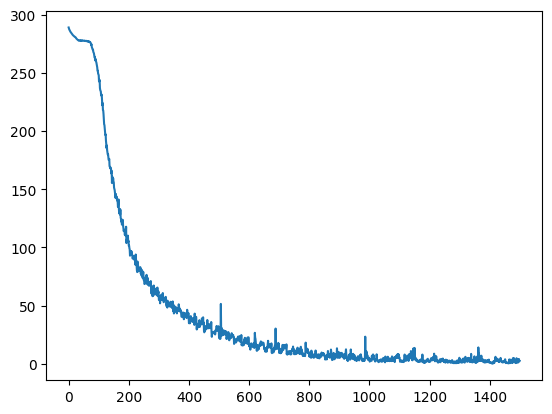

In [64]:
plt.plot(loss_over_time)

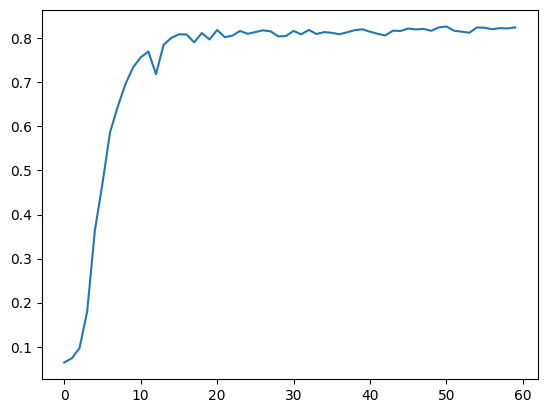

In [65]:
plt.plot(val_accuracy_over_time)

In [66]:
import torchvision
data_transforms = transforms.Compose([transforms.ToTensor(), transforms.Resize((64, 64)), 
                                               transforms.Grayscale(num_output_channels=3)])

In [69]:
from torch import argmax

cap = cv2.VideoCapture(0) #Set the webcam
def Webcam_720p():
    cap.set(3,640)
    cap.set(4,640)

Webcam_720p()
fps = 0
show_score = 0
show_res = 'Nothing'
sequence = 0
while True:
    ret, frame = cap.read() #Capture each frame
    if fps == 4:
        image        = frame[160: 480, 160: 480]
        image_data   = data_transforms(image)
        net.eval()
        dataloader = DataLoader([image_data], batch_size=1, shuffle=True)
        data = next(iter(dataloader))
        prediction = net(data)
        result = argmax(prediction)
        fps = 0
        if result >= 0.5:
            for piece, encoded_class in dataset.encoding.items():
                if result.item() == encoded_class:
                    piece_data = dataset.brick_info.loc[piece]
                    show_res = piece_data['name']
        else:
            show_res = "Nothing"
        
    fps += 1
    cv2.putText(frame, '%s' %(show_res), (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 3)
    # cv2.putText(frame, '(score = %.5f)' %(show_score), (950,300), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2)
    cv2.rectangle(frame,(480,160),(160,480), (250,0,0), 2)
    cv2.imshow("LEGO DETECTOR", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyWindow("LEGO DETECTOR")